In [12]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid", palette="muted", color_codes=True)

df = pd.read_csv("owid_covid_data_us_subset.csv")

df.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,icu_patients,hosp_patients,weekly_hosp_admissions,daily_case_change_rate,daily_death_change_rate,hospitalization_rate,icu_rate,case_fatality_rate,7day_avg_new_cases,7day_avg_new_deaths,hospitalization_need,icu_requirement
0,2020-07-21,3853351.0,60012.0,145801.0,932.0,11390.679,430.994,11458.0,42195.0,30552.0,NaN,NaN,1.095021,0.297352,3.783746,NaN,NaN,High,High
1,2020-07-22,3911870.0,58519.0,146668.0,867.0,11563.663,433.557,12487.0,46107.0,31352.0,1.518652,0.594646,1.178643,0.319208,3.749307,NaN,NaN,High,High
2,2020-07-23,3975206.0,63336.0,147861.0,1193.0,11750.887,437.084,13916.0,47834.0,31679.0,1.619072,0.813402,1.203309,0.350070,3.719581,NaN,NaN,High,High
3,2020-07-24,4047622.0,72416.0,149052.0,1191.0,11964.952,440.604,13627.0,46748.0,31870.0,1.821692,0.805486,1.154950,0.336667,3.682458,NaN,NaN,High,High
4,2020-07-25,4120764.0,73142.0,150306.0,1254.0,12181.163,444.311,14402.0,51831.0,32804.0,1.807036,0.841317,1.257801,0.349498,3.647527,NaN,NaN,High,High


In [13]:
#Function to find precision, recall, and F1 score
def pre_rec_f1(y_pred, y):
    eps = np.finfo(float).eps
    num_cls = len(np.unique(y))
    tp_sum, fp_sum, fn_sum, f1_sum = 0, 0, 0, 0
    tps, fps, fns, pre, rec, f1s = [], [], [], [], [], []
    for i in range(num_cls):
        y_pred_i = y_pred == i
        y_i = y == i
        tp = np.logical_and(y_pred_i, y_i).sum()
        fp = np.logical_and(y_pred_i, (~y_i)).sum()
        fn = np.logical_and((~y_pred_i), y_i).sum()
        tp_sum += tp
        fp_sum += fp
        fn_sum += fn
        f1 = (2 * tp) / (2 * tp + fp + fn + eps)
        f1_sum += f1
        pre.append(tp / (tp + fp + eps))
        rec.append(tp / (tp + fn + eps))
        tps.append(tp)
        fps.append(fp)
        fns.append(fn)
        f1s.append(f1)

    macrof1 = f1_sum / (num_cls + eps)
    microf1 = (2 * tp_sum) / (2 * tp_sum + fp_sum + fn_sum + eps)
    return macrof1, microf1, tps, fps, fns, pre, rec, f1s


### Task 1: Data Cleaning and Exploratory Analysis.
- Cleaning missing values, removing duplicates, and standardizing formats on original data and original data set.
- Exploratory analysis to identify trends, patterns, and anomalies.
- Visualization using Matplotlib and Seaborn.
- Line charts for time-series trends in total_cases, total_deaths, and hospitalization_rate.
- Histograms and boxplots for ICU rates and hospitalization distributions.
- Use StandardScaler to normalize the features before applying a classifier.

Missing values in each column:
date                         0
total_cases                  0
new_cases                    0
total_deaths                 0
new_deaths                   1
total_cases_per_million      0
total_deaths_per_million     0
icu_patients                 0
hosp_patients                0
weekly_hosp_admissions       0
daily_case_change_rate       1
daily_death_change_rate      2
hospitalization_rate         0
icu_rate                     0
case_fatality_rate           0
7day_avg_new_cases           6
7day_avg_new_deaths         13
hospitalization_need         0
icu_requirement              0
dtype: int64

Shape after removing duplicates: (1034, 19)

Basic statistics of numerical columns:
                      date   total_cases     new_cases  total_deaths  \
count                 1034  1.034000e+03  1.034000e+03  1.034000e+03   
mean   2021-12-19 12:00:00  5.828828e+07  9.636701e+04  7.557638e+05   
min    2020-07-21 00:00:00  3.853351e+06  0.000000e+00  1.458010e+

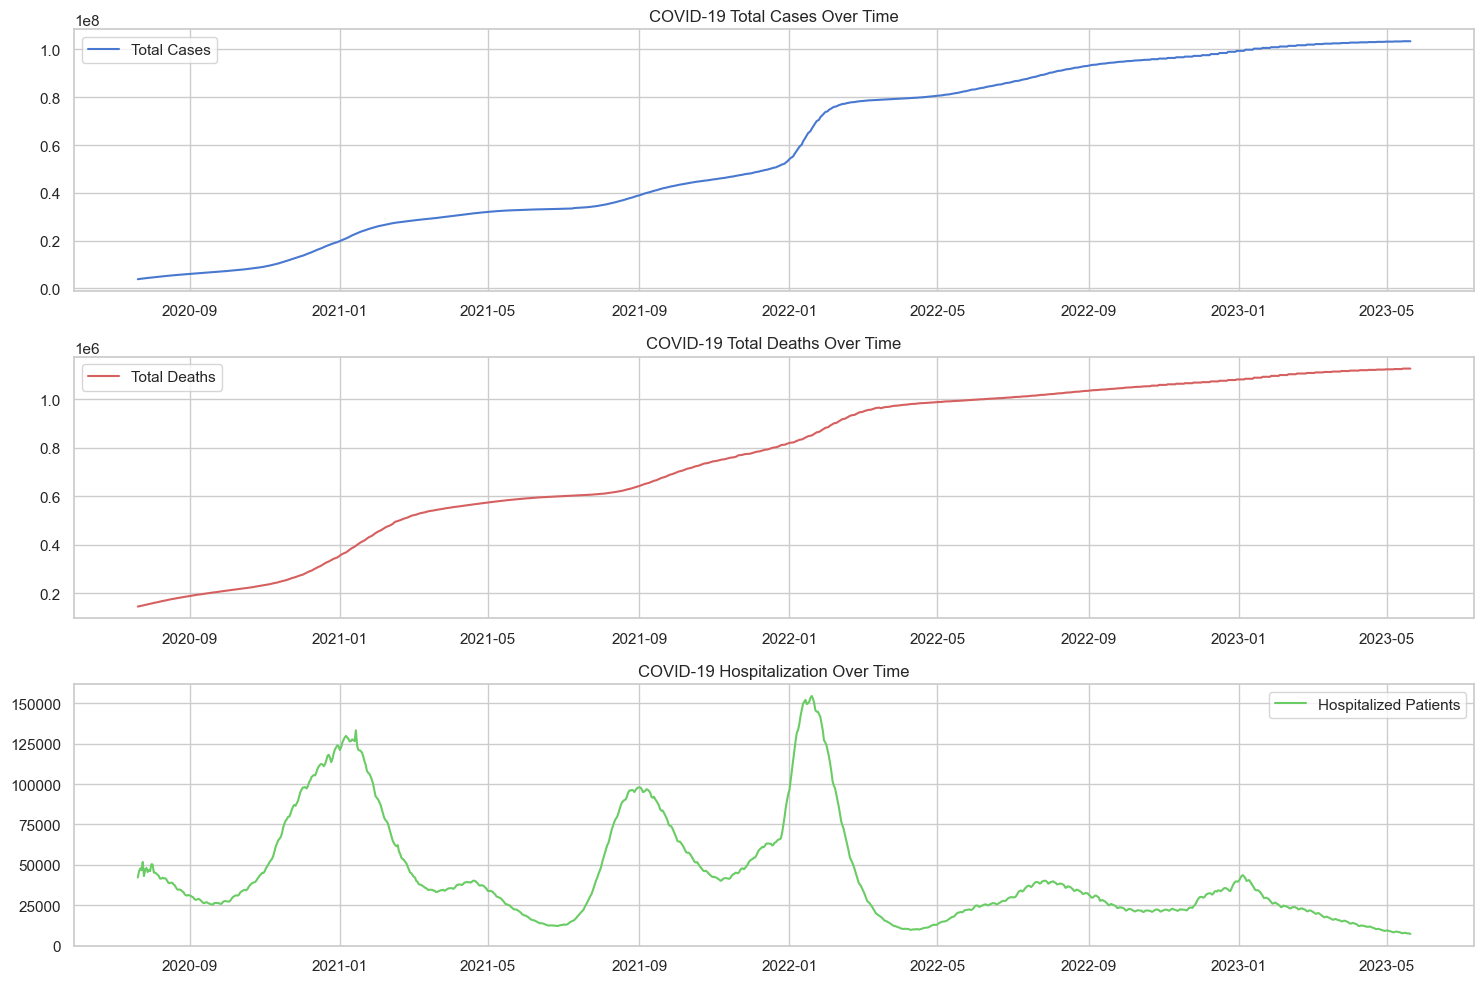

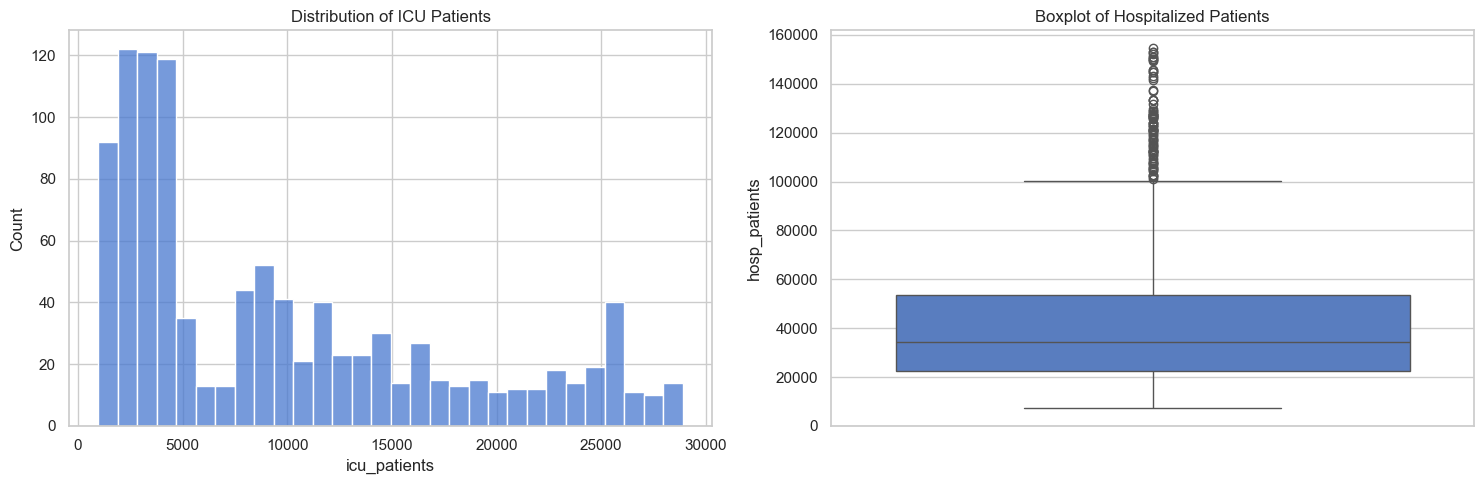


Scaled data summary:
        total_cases  total_deaths  hosp_patients  icu_patients
count  1.034000e+03  1.034000e+03    1034.000000  1.034000e+03
mean  -1.649229e-16  1.649229e-16       0.000000 -1.099486e-16
std    1.000484e+00  1.000484e+00       1.000484  1.000484e+00
min   -1.604507e+00 -1.973768e+00      -1.140504 -1.099236e+00
25%   -8.203378e-01 -6.417977e-01      -0.677572 -8.367627e-01
50%   -2.294107e-01  1.492298e-01      -0.310877 -2.547569e-01
75%    1.038829e+00  9.123285e-01       0.286659  6.023668e-01
max    1.330784e+00  1.201768e+00       3.397637  2.430164e+00


In [14]:
#Code for task 1
# Data Cleaning and Initial Analysis
# Check missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Remove duplicates
df = df.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Basic statistics
print("\nBasic statistics of numerical columns:")
print(df.describe())

# Time series visualization
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.plot(df['date'], df['total_cases'], 'b-', label='Total Cases')
plt.title('COVID-19 Total Cases Over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(df['date'], df['total_deaths'], 'r-', label='Total Deaths')
plt.title('COVID-19 Total Deaths Over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(df['date'], df['hosp_patients'], 'g-', label='Hospitalized Patients')
plt.title('COVID-19 Hospitalization Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribution plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='icu_patients', bins=30)
plt.title('Distribution of ICU Patients')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='hosp_patients')
plt.title('Boxplot of Hospitalized Patients')

plt.tight_layout()
plt.show()

# Feature scaling
numeric_columns = ['total_cases', 'total_deaths', 'hosp_patients', 'icu_patients']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("\nScaled data summary:")
print(df_scaled[numeric_columns].describe())

### Task 2: Correlation and Statistical Analysis (Data subset)
- Compute Pearson correlation coefficients between numerical variables, focusing on icu_requirement and other derived features.
- Create a heatmap to visualize the full correlation matrix, highlighting features with strong relationships (e.g., correlations > ±0.5)
- Scatter plots with regression lines for correlated features.
- Use Chi-Square tests to examine associations between categorical variables
- Tables summarizing ANOVA/Kruskal-Wallis results, with p-values and effect sizes for key variables.


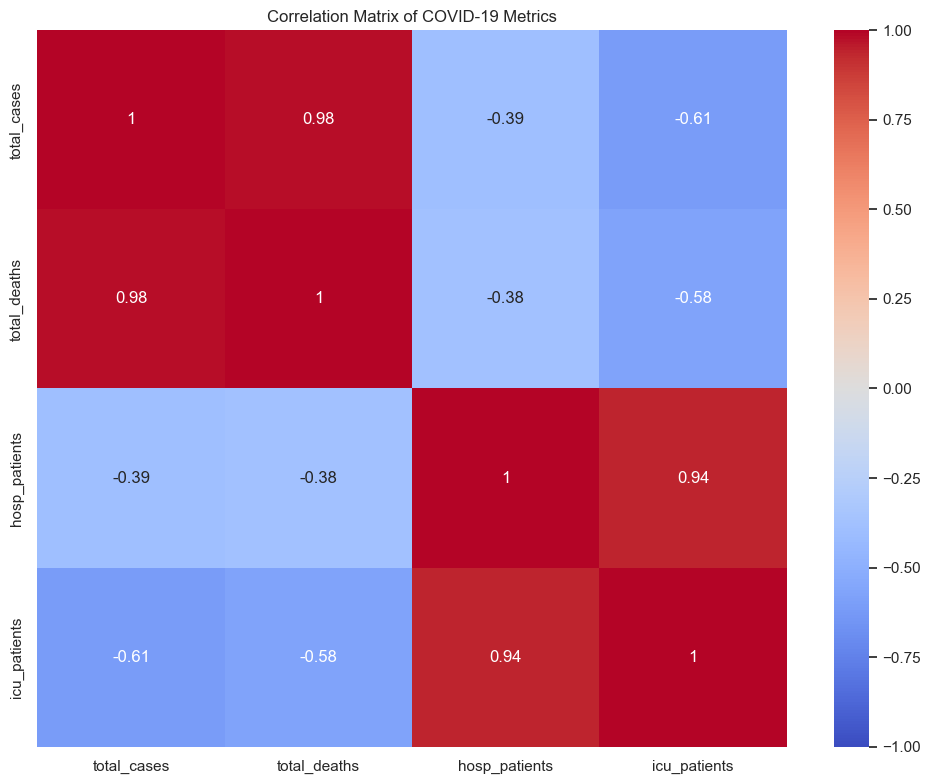

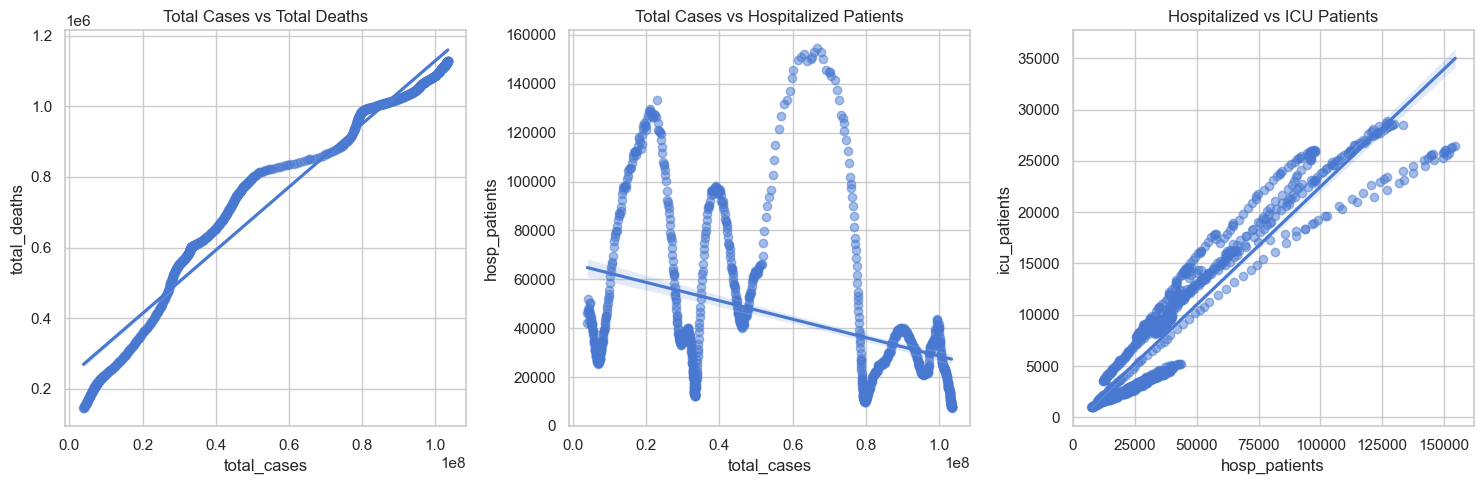


Statistical Analysis Results:
--------------------------------------------------
Chi-square test (High Cases vs High Deaths):
Chi-square statistic: 1030.00
p-value: 0.0000

ANOVA test (ICU Patients across quarters):
F-statistic: 150.77
p-value: 0.0000

Kruskal-Wallis test (ICU Patients across quarters):
H-statistic: 781.53
p-value: 0.0000

Effect size (Eta-squared): 0.6187


In [15]:
#Code for task 2
# Import additional required libraries
from scipy import stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency, f_oneway, kruskal

# Select numerical columns for correlation analysis
numeric_cols = ['total_cases', 'total_deaths', 'hosp_patients', 'icu_patients']

# Compute correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1, 
            center=0)
plt.title('Correlation Matrix of COVID-19 Metrics')
plt.tight_layout()
plt.show()

# Create scatter plots for highly correlated features
plt.figure(figsize=(15, 5))

# Scatter plot: Total Cases vs Total Deaths
plt.subplot(1, 3, 1)
sns.regplot(data=df, x='total_cases', y='total_deaths', scatter_kws={'alpha':0.5})
plt.title('Total Cases vs Total Deaths')

# Scatter plot: Total Cases vs Hospitalized Patients
plt.subplot(1, 3, 2)
sns.regplot(data=df, x='total_cases', y='hosp_patients', scatter_kws={'alpha':0.5})
plt.title('Total Cases vs Hospitalized Patients')

# Scatter plot: Hospitalized Patients vs ICU Patients
plt.subplot(1, 3, 3)
sns.regplot(data=df, x='hosp_patients', y='icu_patients', scatter_kws={'alpha':0.5})
plt.title('Hospitalized vs ICU Patients')

plt.tight_layout()
plt.show()

# Statistical Tests
print("\nStatistical Analysis Results:")
print("-" * 50)

# Create binary categories for chi-square test
df['high_cases'] = df['total_cases'] > df['total_cases'].median()
df['high_deaths'] = df['total_deaths'] > df['total_deaths'].median()

# Chi-square test
contingency_table = pd.crosstab(df['high_cases'], df['high_deaths'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test (High Cases vs High Deaths):")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")

# ANOVA test
# Group data by quarters for comparison
df['quarter'] = pd.PeriodIndex(df['date'], freq='Q')
groups = [group['icu_patients'].dropna() for name, group in df.groupby('quarter')]
f_stat, anova_p = f_oneway(*groups)

print("\nANOVA test (ICU Patients across quarters):")
print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {anova_p:.4f}")

# Kruskal-Wallis H-test
h_stat, kw_p = kruskal(*groups)
print("\nKruskal-Wallis test (ICU Patients across quarters):")
print(f"H-statistic: {h_stat:.2f}")
print(f"p-value: {kw_p:.4f}")

# Effect size (Eta-squared) for ANOVA
def calculate_eta_squared(groups):
    all_values = np.concatenate(groups)
    grand_mean = np.mean(all_values)
    n = len(all_values)
    
    ss_between = sum(len(g) * (np.mean(g) - grand_mean)**2 for g in groups)
    ss_total = sum((x - grand_mean)**2 for x in all_values)
    
    return ss_between / ss_total

eta_squared = calculate_eta_squared(groups)
print(f"\nEffect size (Eta-squared): {eta_squared:.4f}")

### Task 3: Predictive Modeling: Decision Tree (Data Subset)
- Perform 5-fold cross-validation for each of the 5 max depths and compute accuracy, precision, recall, macro-F1 and micro-F1 and find which max depth works best on predicting the icu requirement.
- Testing max_depth with 3, 5, 10, 15, 20.
- Use features like icu_rate, case_fatality_rate, hospitalization_rate, etc., to predict how many ICU patients will be needed on a given day.
- Visualize the overall best Decision Tree for ICU Patient Prediction and analyze the trade off between different tree depth choices (General Geni/Entropy).
- Performance metric comparisons.


In [ ]:
#Code for task 3
# Import required libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
import time

# Prepare features and target
# Create derived features
df['case_fatality_rate'] = df['total_deaths'] / df['total_cases']
df['hospitalization_rate'] = df['hosp_patients'] / df['total_cases']
df['icu_rate'] = df['icu_patients'] / df['hosp_patients']

# Select features
features = ['total_cases', 'total_deaths', 'hosp_patients', 
           'case_fatality_rate', 'hospitalization_rate']
X = df[features].fillna(0)  # Handle any missing values
y = pd.qcut(df['icu_patients'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Initialize variables for storing results
max_depths = [3, 5, 10, 15, 20]
results = []
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each max_depth
for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Record training time
    start_time = time.time()
    
    # Compute metrics using cross-validation
    accuracy = cross_val_score(dt, X, y, cv=cv, scoring='accuracy').mean()
    
    # Get other metrics using custom function
    macrof1_scores = []
    microf1_scores = []
    precision_scores = []
    recall_scores = []
    
    for train_idx, test_idx in cv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        
        macrof1, microf1, _, _, _, precision, recall, _ = pre_rec_f1(y_pred, y_test)
        macrof1_scores.append(macrof1)
        microf1_scores.append(microf1)
        precision_scores.append(np.mean(precision))
        recall_scores.append(np.mean(recall))
    
    training_time = time.time() - start_time
    
    # Store results
    results.append({
        'max_depth': depth,
        'accuracy': accuracy,
        'macro_f1': np.mean(macrof1_scores),
        'micro_f1': np.mean(microf1_scores),
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'training_time': training_time
    })

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("\nDecision Tree Performance Metrics:")
print(results_df)

# Plot performance metrics
plt.figure(figsize=(15, 5))

# Accuracy and F1 scores
plt.subplot(1, 2, 1)
plt.plot(max_depths, results_df['accuracy'], 'o-', label='Accuracy')
plt.plot(max_depths, results_df['macro_f1'], 's-', label='Macro F1')
plt.plot(max_depths, results_df['micro_f1'], '^-', label='Micro F1')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Model Performance vs Tree Depth')
plt.legend()
plt.grid(True)

# Precision and Recall
plt.subplot(1, 2, 2)
plt.plot(max_depths, results_df['precision'], 'o-', label='Precision')
plt.plot(max_depths, results_df['recall'], 's-', label='Recall')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Precision-Recall vs Tree Depth')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Train and visualize the best performing model
best_depth = results_df.loc[results_df['macro_f1'].idxmax(), 'max_depth']
best_dt = DecisionTreeClassifier(max_depth=int(best_depth), random_state=42)
best_dt.fit(X, y)

plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=features, class_names=le.classes_, 
          filled=True, rounded=True)
plt.title(f'Best Decision Tree (max_depth={int(best_depth)})')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': best_dt.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance in Decision Tree Model')
plt.show()

### Task 4: Predictive Modeling: KNN (Data Subset)
- Perform 5-fold cross-validation for each of the 5 kernel functions and compute accuracy, precision, recall, macro-F1, and micro-F1 on predicting the icu requirement and research which kernel function works the best on predicting the icu requirement.
- Using different numbers of neighbors (e.g. 2, 5, 10, 50)
- Analyze how the different numbers of neighbors affect the performance of the model.
- Analyze the trade-off between different numbers of neighbor's choices.
- Performance metric comparisons. 

In [17]:
#Code for task 4

### Task 5: Predictive Modeling: SVM (Data Subset)
- Perform 5-fold cross-validation for each of the 4 kernel functions and compute accuracy, precision, recall, macro-F1, and micro-F1 on predicting the icu requirement and research which kernel function works the best.
- Using different kernels: Linear, Polynomials, RBF, Sigmoids.
- Compare kernel function performances and explain their impact.
- Analyze trade-offs between different kernel choices.
- Performance metric comparisons.

In [18]:
#Code for task 5

### Task 6: Model Comparison Methodology (Data Subset)
- Compare best-performing models from Decision Tree, KNN, and SVM.
- Training Time: Record and analyze the computational complexity and efficiency of each model.
- Performance Metrics: Compute and compare accuracy, precision, recall, macro-F1, and micro-F1 across models.
- Analyze the outcome of the comparison.

In [19]:
#Code for task 6

### Task 7: Regional Pattern Analysis and Comparison (On the continent attribute of the Full data set)
- Investigate patterns and trends across different regions or states in the original full dataset.
- Segment the data by geographical regions (continent).
- Use clustering techniques (e.g., K-Means or hierarchical clustering) to group regions with similar COVID-19 characteristics,  total_cases, total_deaths, hosp_patients.etc

In [20]:
#Code for task 7


### Task 8: Advanced Feature Derivation and Preprocessing (Full dataset)
- Generate time-based features such as infection growth rates, recovery rates, and rolling averages.
- Apply quantile-based discretization for continuous variables (e.g., hospitalization rates).
- Use Principal Component Analysis (PCA) to reduce dimensionality and derive composite features (e.g., healthcare capacity).

In [21]:
#Code for task 8

### Task 9: Time Series Forecasting Using Deep Learning
- Forecast key metrics (e.g., ICU requirements, total cases) using state-of-the-art time series models.
- Implement Long Short-Term Memory (LSTM) networks to capture temporal dependencies.
- Evaluate models using metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

In [22]:
#Code for task 9